In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 데이터 불러오기
spec_log_loan = pd.read_csv('/Users/sungahwang/Desktop/BigContest_data/loan_spec_log.csv')
spec_log_loan

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied,weekday,loanapply_insert_hour,user_id,Labels,action_cnt,use_day_cnt,first_event,timeout_sum(s)
0,1748340,7,191,42000000.0,13.6,NaN,Tuesday,13,430982.0,2.0,176.0,17.0,EndLoanApply,201.0
1,1748340,25,169,24000000.0,17.9,NaN,Tuesday,13,430982.0,2.0,176.0,17.0,EndLoanApply,201.0
2,1748340,2,7,24000000.0,18.5,NaN,Tuesday,13,430982.0,2.0,176.0,17.0,EndLoanApply,201.0
3,1748340,4,268,29000000.0,10.8,NaN,Tuesday,13,430982.0,2.0,176.0,17.0,EndLoanApply,201.0
4,1748340,11,118,5000000.0,16.4,NaN,Tuesday,13,430982.0,2.0,176.0,17.0,EndLoanApply,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13525601,1969227,2,7,30000000.0,13.6,0.0,Monday,14,109899.0,4.0,178.0,27.0,EndLoanApply,350.0
13525602,1969227,33,110,9000000.0,14.4,0.0,Monday,14,109899.0,4.0,178.0,27.0,EndLoanApply,350.0
13525603,1969227,50,142,3000000.0,11.2,0.0,Monday,14,109899.0,4.0,178.0,27.0,EndLoanApply,350.0
13525604,1969227,22,100,4000000.0,15.3,0.0,Monday,14,109899.0,4.0,178.0,27.0,EndLoanApply,350.0


In [3]:
a = spec_log_loan[spec_log_loan['Labels'] == 0.0]
b = spec_log_loan[spec_log_loan['Labels'] == 1.0]
c = spec_log_loan[spec_log_loan['Labels'] == 2.0]
d = spec_log_loan[spec_log_loan['Labels'] == 3.0]
e = spec_log_loan[spec_log_loan['Labels'] == 4.0]

<AxesSubplot:ylabel='is_applied'>

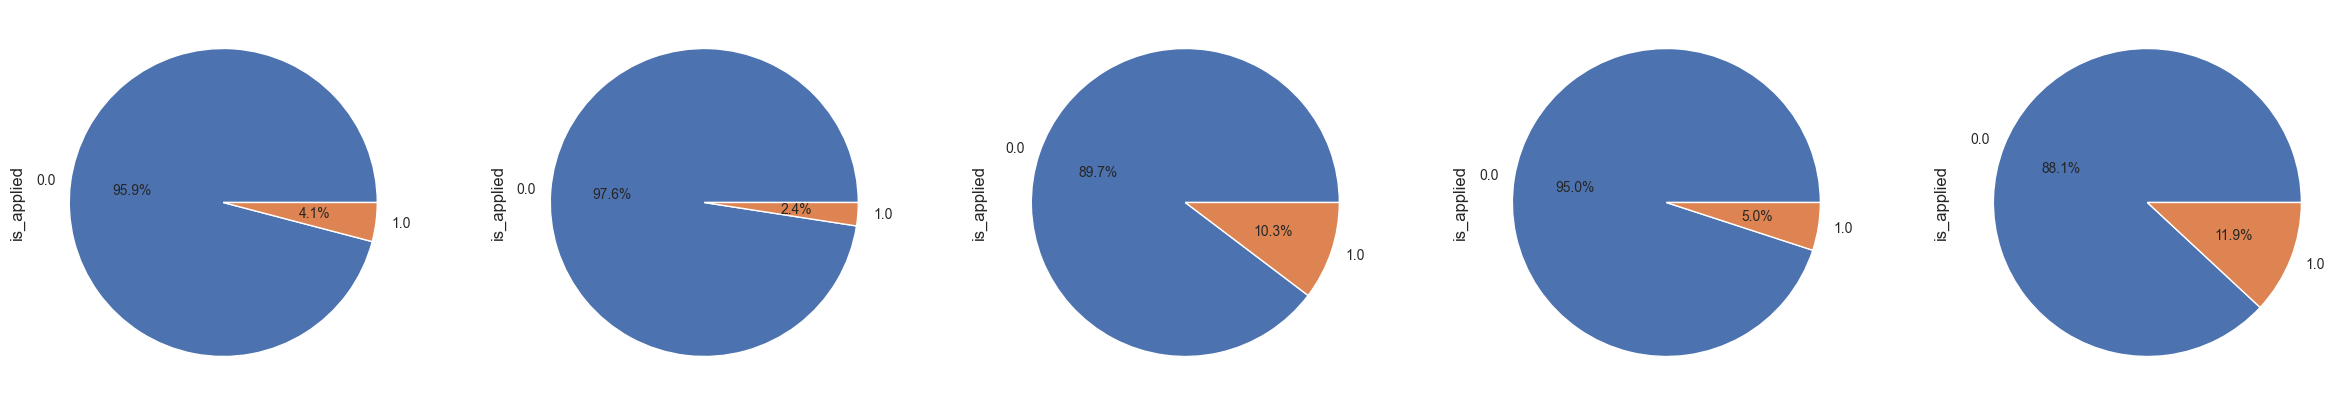

In [15]:
fig, ax = plt.subplots(ncols=5)
sns.set(rc={'figure.figsize':(30,10)})

a['is_applied'].value_counts().plot.pie(ax= ax[0], autopct='%1.1f%%',textprops={'fontsize': 10} )
b['is_applied'].value_counts().plot.pie(ax= ax[1], autopct='%1.1f%%',textprops={'fontsize': 10} )
c['is_applied'].value_counts().plot.pie(ax= ax[2], autopct='%1.1f%%',textprops={'fontsize': 10} )
d['is_applied'].value_counts().plot.pie(ax= ax[3], autopct='%1.1f%%',textprops={'fontsize': 10} )
e['is_applied'].value_counts().plot.pie(ax= ax[4], autopct='%1.1f%%',textprops={'fontsize': 10} )

In [5]:
is_applied_1 = spec_log_loan[spec_log_loan['is_applied']== 1.0]
is_applied_0 = spec_log_loan[spec_log_loan['is_applied']== 0.0]

In [6]:
print(is_applied_1['timeout_sum(s)'].mean())
print(is_applied_0['timeout_sum(s)'].mean())

203.86574004166175
181.23582523902274


In [7]:
print(is_applied_1['action_cnt'].mean())
print(is_applied_0['action_cnt'].mean())

119.72472505980916
105.4086841135986


In [8]:
print(is_applied_1['use_day_cnt'].mean())
print(is_applied_0['use_day_cnt'].mean())

12.497477554510475
11.874331907748182


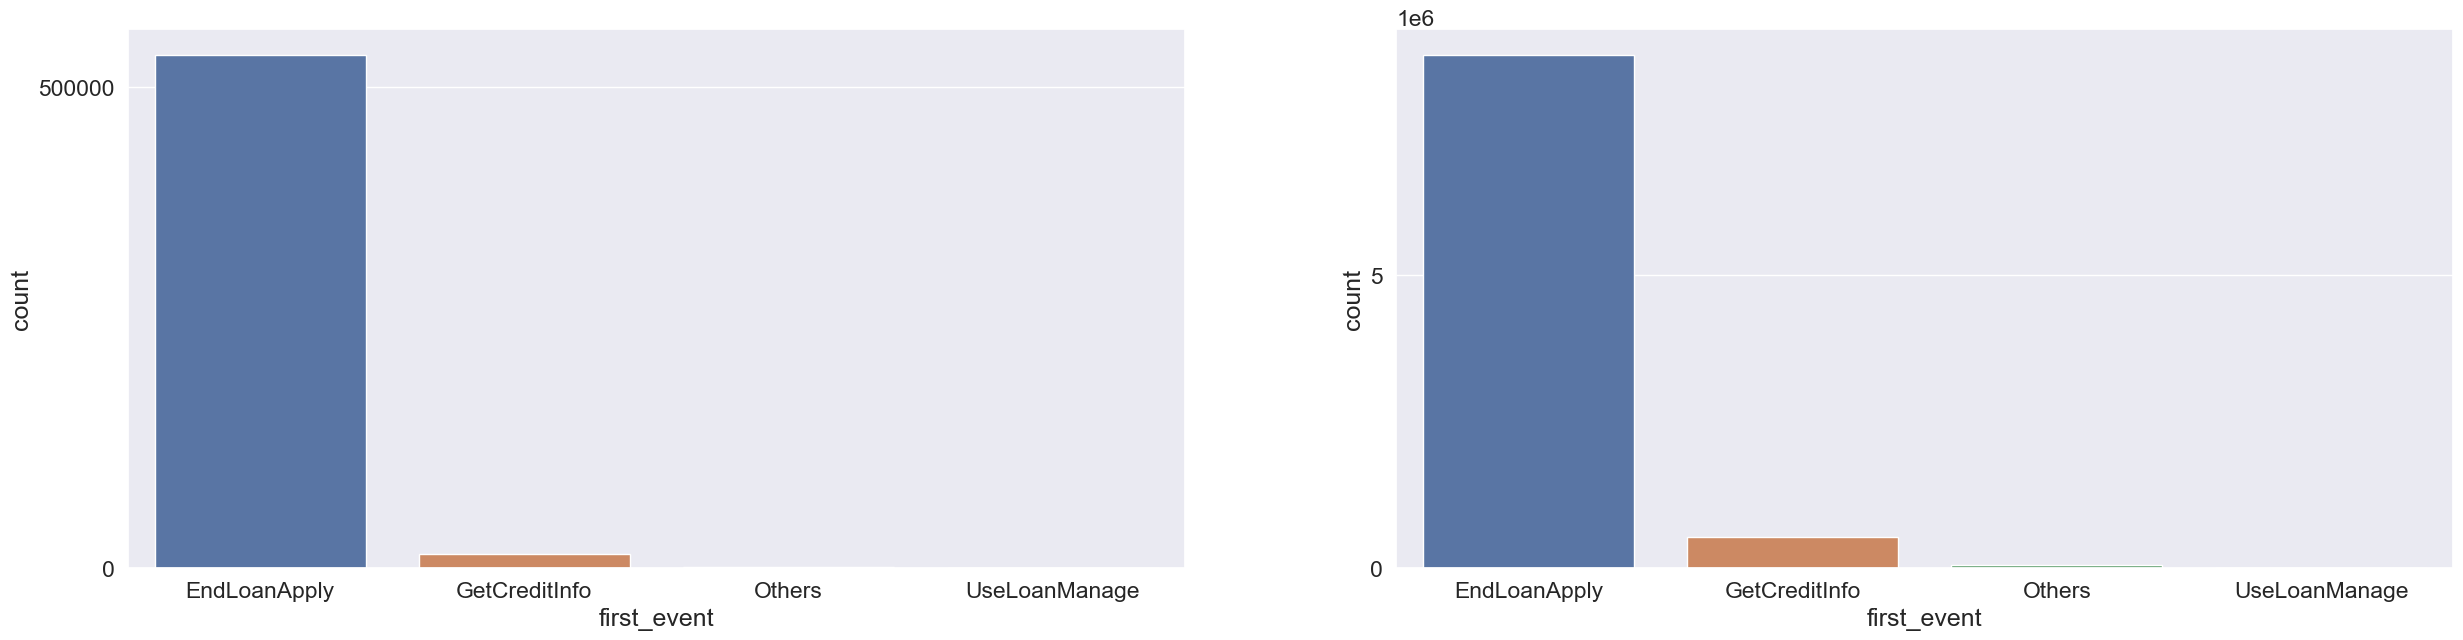

In [29]:
fig, ax = plt.subplots(ncols=2)
sns.countplot(data = is_applied_1, x = 'first_event', ax= ax[0])
sns.countplot(data = is_applied_0, x = 'first_event', ax= ax[1])
sns.set(font_scale= 100)

In [10]:
print(is_applied_1.groupby('first_event').size())
print(is_applied_0.groupby('first_event').size())

first_event
EndLoanApply     533306
GetCreditInfo     15107
Others             1250
UseLoanManage         2
dtype: int64
first_event
EndLoanApply     8744468
GetCreditInfo     528472
Others             53040
UseLoanManage         15
dtype: int64


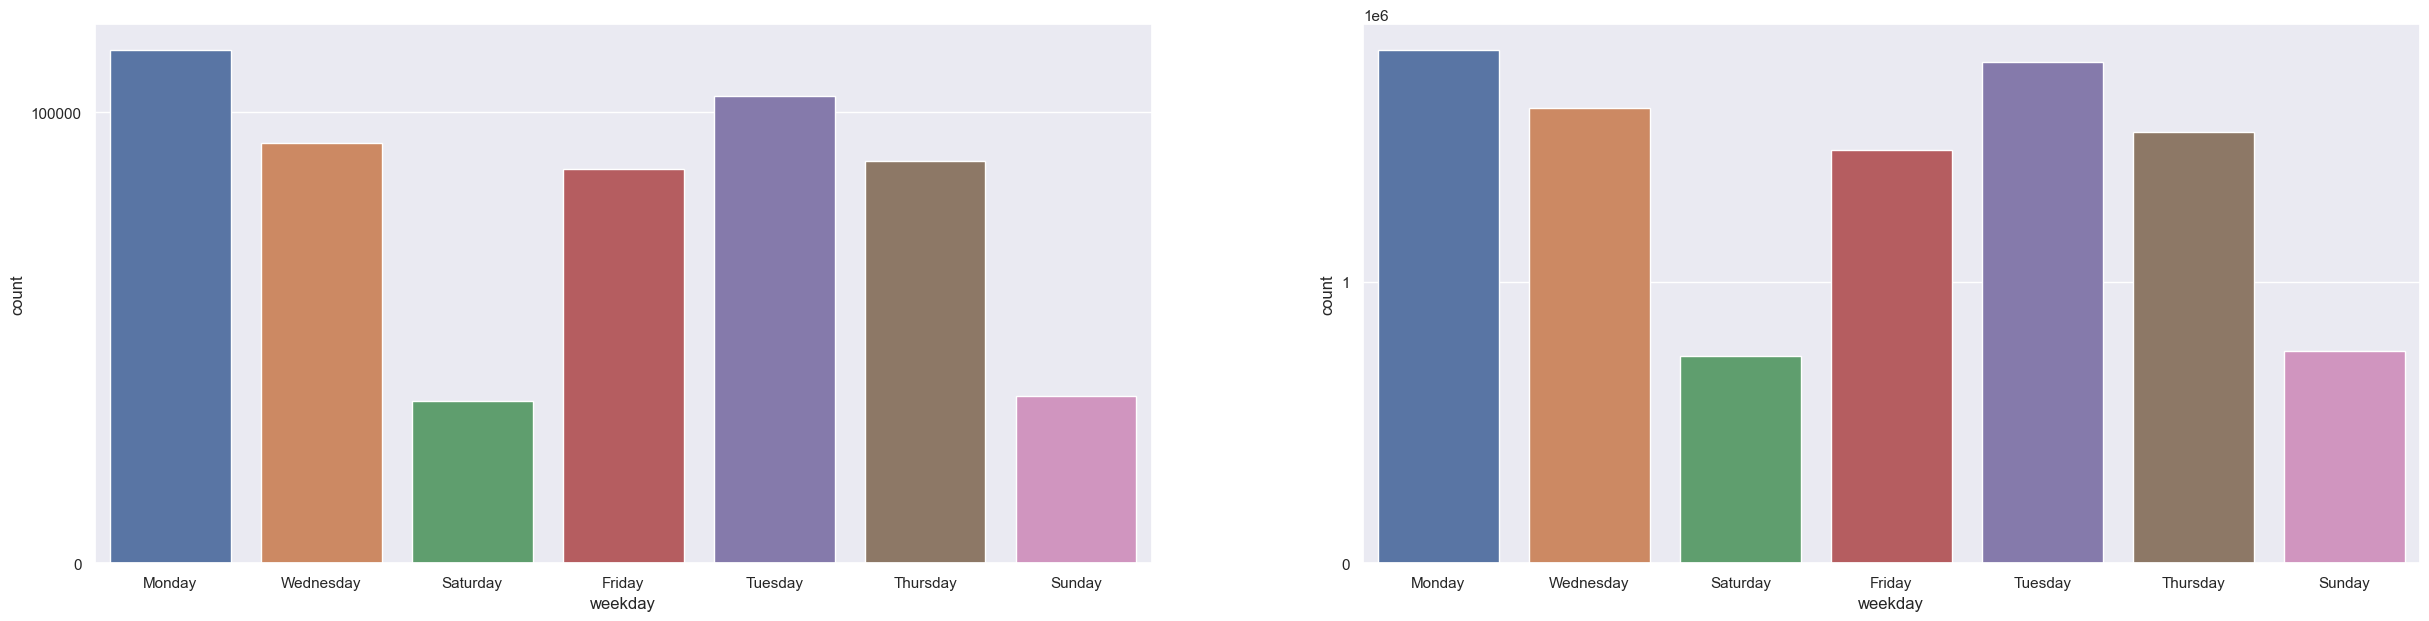

In [40]:
fig, ax = plt.subplots(ncols=2)
sns.countplot(data = is_applied_1, x = 'weekday', ax= ax[0])
sns.countplot(data = is_applied_0, x = 'weekday', ax= ax[1])
sns.set(font_scale= 100)

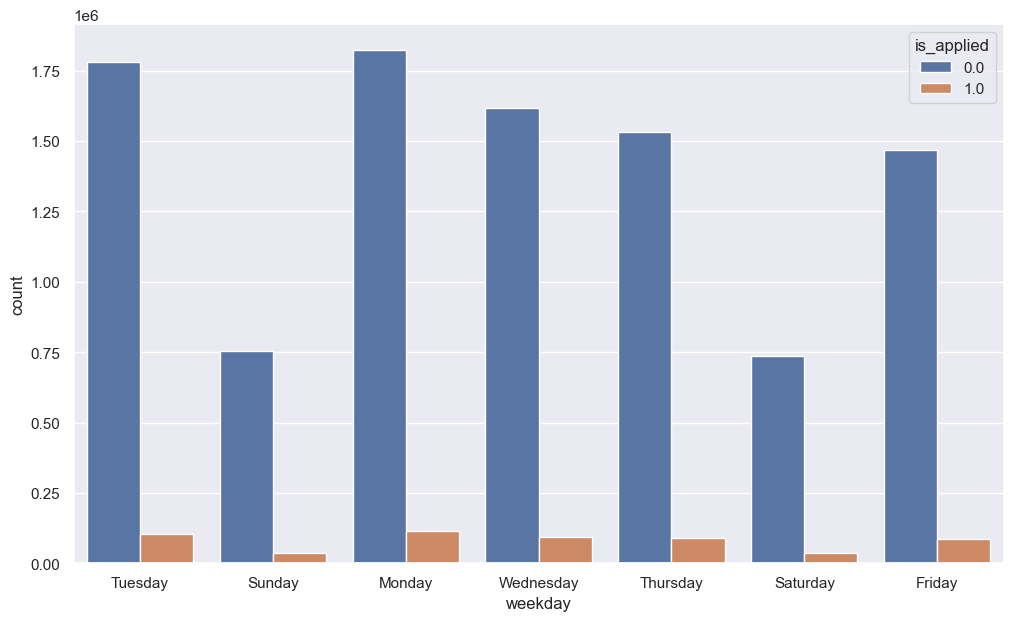

In [12]:
ax = plt.subplots(figsize = (12, 7))
ax = sns.countplot(x = 'weekday', hue = 'is_applied', data = spec_log_loan)

<AxesSubplot:ylabel='weekday'>

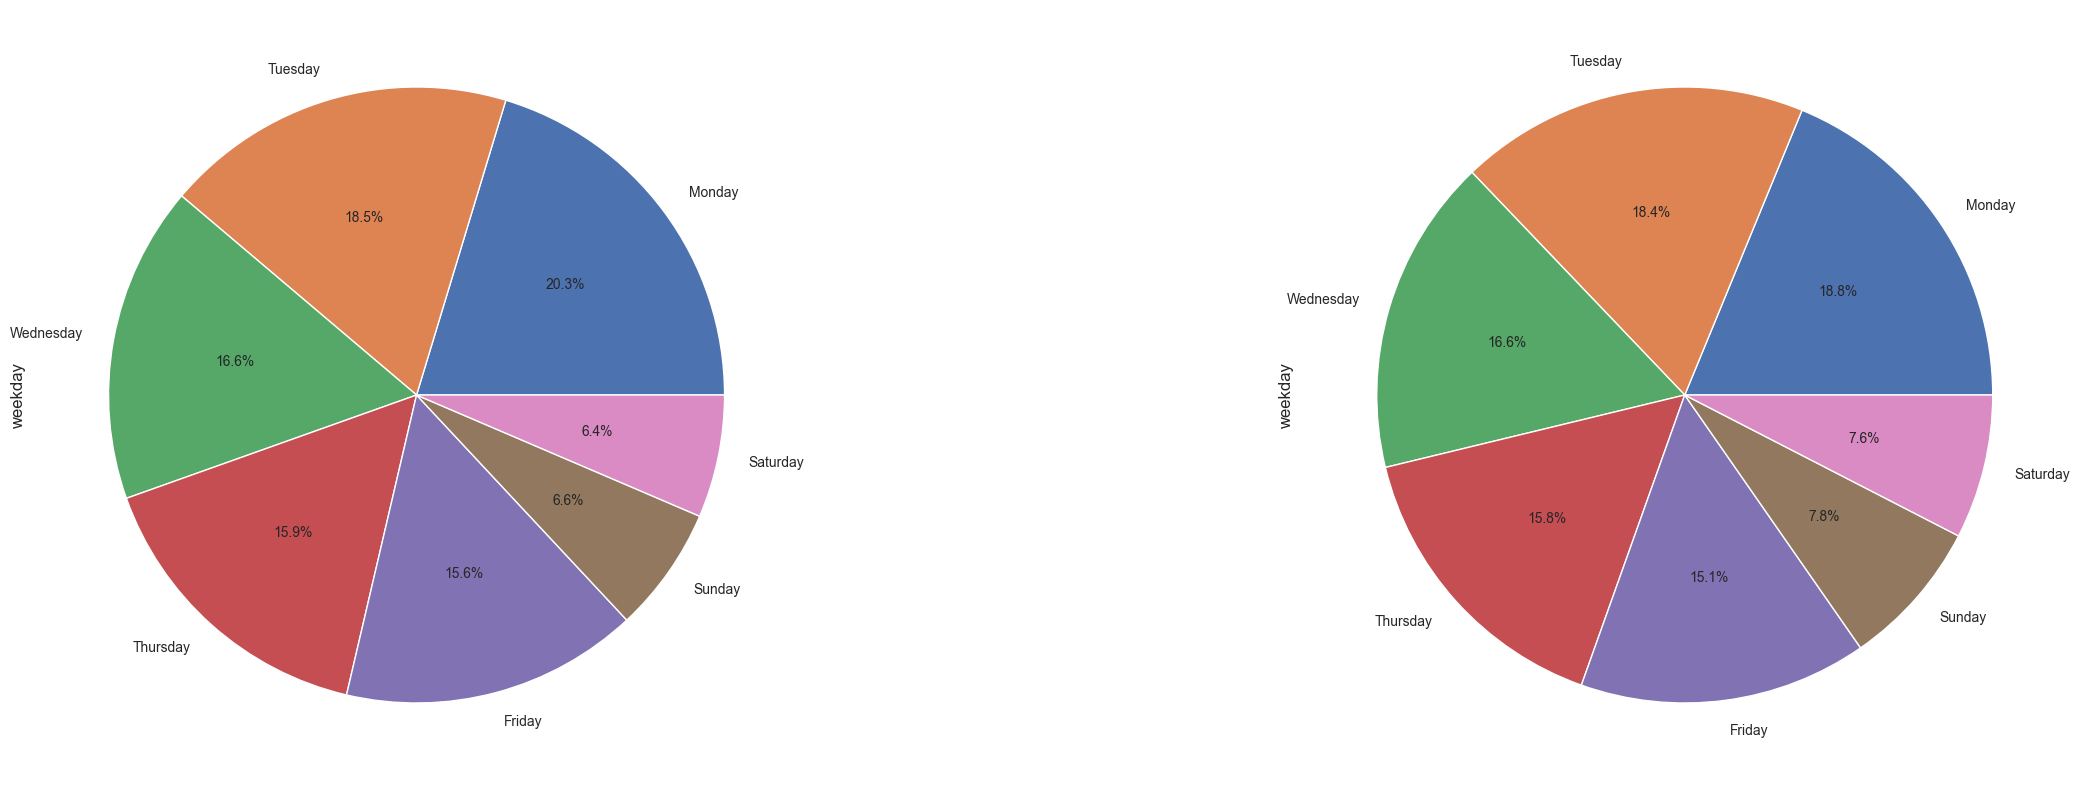

In [25]:
fig, ax = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(30,7)})

is_applied_1['weekday'].value_counts().plot.pie(ax= ax[0], autopct='%1.1f%%',textprops={'fontsize': 10} )
is_applied_0['weekday'].value_counts().plot.pie(ax= ax[1], autopct='%1.1f%%',textprops={'fontsize': 10} )

<AxesSubplot:xlabel='loanapply_insert_hour', ylabel='count'>

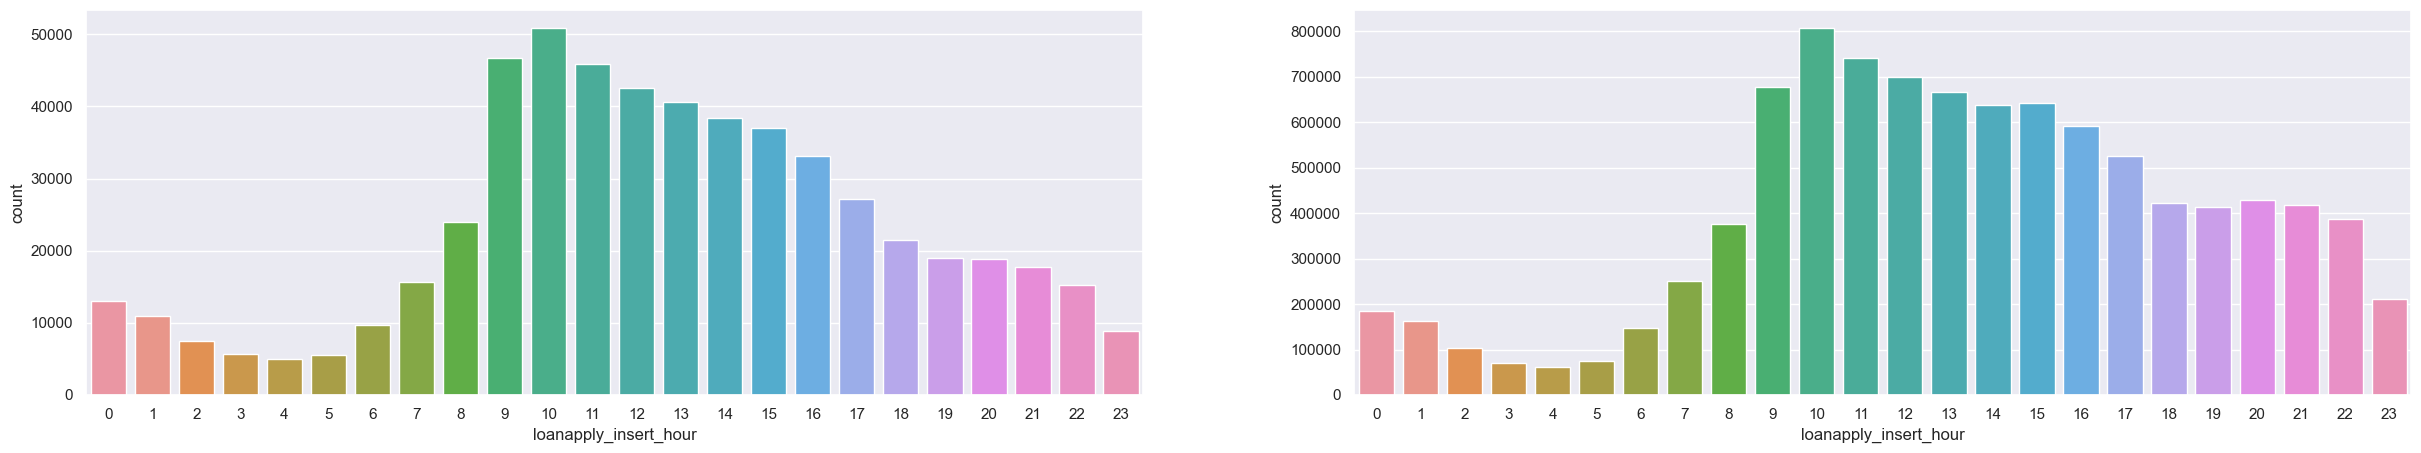

In [14]:
fig, ax = plt.subplots(ncols=2)
sns.countplot(data = is_applied_1, x = 'loanapply_insert_hour', ax= ax[0])
sns.countplot(data = is_applied_0, x = 'loanapply_insert_hour', ax= ax[1])